# Guide to use Markov libraries

In [1]:
# import whatever libraries I want
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import msm_scripts as ms
import test_system_generator as tsg

# this stuff is import for my comparison of probability distributions later on
from dit.divergences import jensen_shannon_divergence
import dit

## First I want to declare my simulation object and generate some trajectories

I want to have the option for either a small user-defined chain or a large chain that describes a given potential. In this instance I am creating a simulation object and generating a random dataset from that object.

In [2]:
# define a simulation object in a given potential with a particular biasing force
sim=tsg.simulation(potential='double_well',sim_length=200000,biasing_protocol=[0,1],num_of_states=100,T=300)
# generate a dataset from the above defined simulation object
simulation_data= [ ]
for i in range(5):
    simulation_data.append(sim.generate_data())


Next we can plot the simulation trajectory we just generated as well as looking at the histogram counts of how often each state is visited.

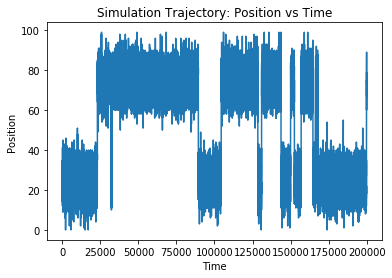

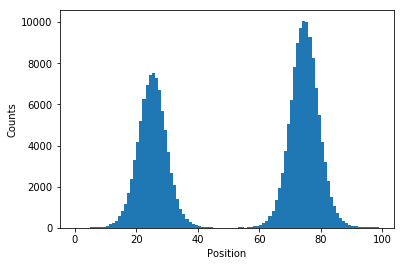

In [3]:
simulation_data[0].plot_data() # plot of trajectory
simulation_data[0].hist_data() # plot of trajectory

# Next I want to build an MSM from my data

So I construct a Markov model object using my simulation and data set objects.

In [4]:
M=ms.discrete_markov_model(simulation_data,sim,lag_time=1)

(Created a Markov model object at lag time 1 consisting of 5 trajctories)


Now that I have my Markov model object, I can compute the free energy profile from the Markov chain.

/home/k1594879/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


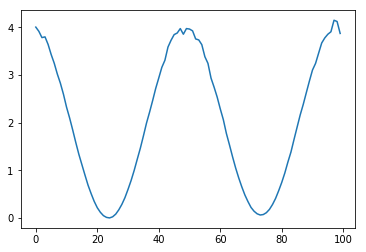

In [5]:
G, peq = ms.free_energy_profile(M.MSM, M.temp)

## Let's go further and get the KL divergence between our estimate $P_{eq}$ and the true $P$

In [6]:
p_true=np.exp(-sim.y/( 0.001987 * sim.temp))
p_true = p_true/sum(p_true)

In [7]:
X = dit.ScalarDistribution(peq)
Y = dit.ScalarDistribution(p_true)
error=jensen_shannon_divergence([X,Y])
print(np.sqrt(error))

0.24088805862960413


/home/k1594879/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


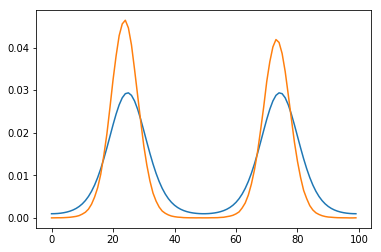

In [10]:
plt.plot(p_true)
plt.plot(peq)